### INITIAL ANALYSIS FOR GREEN BAY PACKERS

##### DATA DESCRIPTION

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|date	|Date of game|
|season	|Year of season|
|neutral|	Whether game was on a neutral site|
|playoff|	Whether game was in playoffs, and the playoff round if so|
|team1|	 Abbreviation for home team|
|team2|	 Abbreviation for away team|
|elo1_pre	|Home team's Elo rating before the game|
|elo2_pre	|Away team's Elo rating before the game|
|elo_prob1	|Home team's probability of winning according to Elo ratings|
|elo_prob2	|Away team's probability of winning according to Elo ratings|
|elo1_post	|Home team's Elo rating after the game|
|elo2_post	|Away team's Elo rating after the game|
|qbelo1_pre	|Home team's quarterback-adjusted base rating before the game|
|qbelo2_pre	|Away team's quarterback-adjusted base rating before the game|
|qb1	|Name of home starting quarterback|
|qb2	|Name of away starting quarterback|
|qb1_value_pre	|Home starting quarterbacks's raw Elo value before the game|
|qb2_value_pre	|Away starting quarterbacks's raw Elo value before the game|
|qb1_adj	|Home starting quarterbacks's Elo adjustment for the game|
|qb2_adj	|Away starting quarterbacks's Elo adjustment for the game|
|qbelo_prob1	|Home team's probability of winning according to quarterback-adjusted Elo|
|qbelo_prob2	|Away team's probability of winning according to quarterback-adjusted Elo|
|qb1_game_value	|Home quarterback's Elo value during this game|
|qb2_game_value	|Away quarterback's Elo value during this game|
|qb1_value_post	|Home starting quarterbacks's raw Elo value after the game|
|qb2_value_post	|Away starting quarterbacks's raw Elo value after the game|
|qbelo1_post	|Home team's quarterback-adjusted base rating after the game|
|qbelo2_post	|Away team's quarterback-adjusted base rating after the game|
|score1	|Home team's score|
|score2	|Away team's score|
|quality	|Rating of game's quality, based on the harmonic mean of the teams’ pregame Elo ratings, scaled from 0-100|
|importance	|Rating of game's importance, based on how much the result would affect the model's forecasted playoff odds, scaled from 0-100|
|total_rating	|The average of quality and importance|

##### ANALYSIS:


##### FEATURE ENGINEERING:

###### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import scipy.stats

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("nfl_elo.csv",parse_dates=['date'], index_col=["date"])

In [4]:
df.tail()

season  neutral playoff team1 team2     elo1_pre     elo2_pre  elo_prob1  elo_prob2    elo1_post    elo2_post   qbelo1_pre   qbelo2_pre               qb1               qb2  qb1_value_pre  qb2_value_pre    qb1_adj    qb2_adj  qbelo_prob1  qbelo_prob2  qb1_game_value  qb2_game_value  qb1_value_post  qb2_value_post  qbelo1_post  qbelo2_post  score1  score2  quality  importance  total_rating
date                                                                                                                                                                                                                                                                                                                                                                                                              
2022-01-23    2021        0       d    TB   LAR  1681.797158  1632.341105   0.659005   0.340995  1662.522916  1651.615346  1649.547292  1615.165080         Tom Brady  Matthew Stafford     249.882409     179.870436  11.456236  -0.623739     0.681440     0.318560      132.180809      379.027146      238.112249      199.786107  1629.446888  1635.265484      27      30     96.0       100.0          98.0
2022-01-23    2021        0       d    KC   BUF  1699.470145  1683.332367   0.614689   0.385311  1713.932369  1668.870143  1687.450699  1656.910634   Patrick Mahomes        Josh Allen     273.771767     275.630099  20.577067  18.202487     0.652720     0.347280      622.042187      434.101420      308.598809      291.477231  1700.324756  1644.036577      42      36    100.0       100.0         100.0
2022-01-30    2021        0       c    KC   CIN  1713.932369  1569.498961   0.769519   0.230481  1690.352000  1593.079331  1700.324756  1559.717895   Patrick Mahomes        Joe Burrow     308.598809     190.637925  36.961734  24.405309     0.810417     0.189583      134.683170      153.972640      291.207245      186.971396  1674.943733  1585.098917      24      27     98.0       100.0          99.0
2022-01-30    2021        0       c   LAR    SF  1651.615346  1621.465562   0.633608   0.366392  1661.352751  1611.728157  1635.265484  1631.632019  Matthew Stafford   Jimmy Garoppolo     199.786107     117.398901   9.365284 -11.464001     0.636093     0.363907      248.504596      197.148060      204.657956      125.373817  1644.929010  1621.968494      20      17     96.0       100.0          98.0
2022-02-13    2021        1       s   CIN   LAR  1593.079331  1661.352751   0.317089   0.682911  1584.789928  1669.642154  1585.098917  1644.929010        Joe Burrow  Matthew Stafford     186.971396     204.657956  21.351780  11.332944     0.315060     0.684940       85.946948      160.915302      176.868952      200.283690  1576.868287  1653.159640      20      23     95.0       100.0          98.0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17095 entries, 1920-09-26 to 2022-02-13
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          17095 non-null  int64  
 1   neutral         17095 non-null  int64  
 2   playoff         603 non-null    object 
 3   team1           17095 non-null  object 
 4   team2           17095 non-null  object 
 5   elo1_pre        17095 non-null  float64
 6   elo2_pre        17095 non-null  float64
 7   elo_prob1       17095 non-null  float64
 8   elo_prob2       17095 non-null  float64
 9   elo1_post       17095 non-null  float64
 10  elo2_post       17095 non-null  float64
 11  qbelo1_pre      14933 non-null  float64
 12  qbelo2_pre      14933 non-null  float64
 13  qb1             14933 non-null  object 
 14  qb2             14933 non-null  object 
 15  qb1_value_pre   14933 non-null  float64
 16  qb2_value_pre   14933 non-null  float64
 17  qb1_adj       

In [11]:
##### Splitting dataframe into games before and after the AFC/NFC Fusion. In 1966 Season
df1, df2 = [x for _, x in df.groupby(df['season'] < 1966)]

In [13]:
df_SP = df1

In [14]:
df_SP

season  neutral playoff team1 team2     elo1_pre     elo2_pre  elo_prob1  elo_prob2    elo1_post    elo2_post   qbelo1_pre   qbelo2_pre               qb1               qb2  qb1_value_pre  qb2_value_pre    qb1_adj    qb2_adj  qbelo_prob1  qbelo_prob2  qb1_game_value  qb2_game_value  qb1_value_post  qb2_value_post  qbelo1_post  qbelo2_post  score1  score2  quality  importance  total_rating
date                                                                                                                                                                                                                                                                                                                                                                                                              
1966-09-02    1966        0     NaN   MIA   OAK  1300.000000  1523.365000   0.286668   0.713332  1287.685000  1535.681000  1300.000000  1523.320809         Dick Wood   Cotton Davidson      73.282973      89.764573 -14.938970   1.977796     0.267553     0.732447     -182.853892     -154.440000       47.669287       65.344116  1288.586376  1534.734433      14      23      6.0         NaN           NaN
1966-09-03    1966        0     NaN   TEN   DEN  1377.030000  1382.690000   0.584576   0.415424  1406.669000  1353.051000  1376.304495  1383.369283     George Blanda  Mickey Slaughter      33.816121      49.238303  -7.915569  -4.015832     0.568825     0.431175      231.294855      -55.911447       53.563994       38.723328  1407.220870  1352.452907      45       7      3.0         NaN           NaN
1966-09-04    1966        0     NaN   LAC   BUF  1542.653000  1619.002000   0.483673   0.516327  1574.255000  1587.400000  1539.488456  1621.746408         John Hadl         Jack Kemp     101.310079      79.030950   1.958802  -0.888078     0.477464     0.522536      230.623604     -170.219562      114.241432       54.105899  1571.534146  1589.700719      27       7     84.0         NaN           NaN
1966-09-09    1966        0     NaN   MIA   NYJ  1287.685000  1453.681000   0.358615   0.641385  1275.398000  1465.968000  1288.586376  1452.606478       Rick Norton   Mike Taliaferro       0.000000      -1.928381 -74.668152 -21.590926     0.258841     0.741159       23.029974      -31.053429        2.302997       -4.840886  1280.022162  1461.170692      14      19      0.0         NaN           NaN
1966-09-10    1966        0     NaN   LAC    NE  1574.255000  1475.332000   0.719830   0.280170  1591.041000  1458.546000  1571.534146  1480.182564         John Hadl      Babe Parilli     114.241432      97.418512   8.326538   1.803571     0.688949     0.311051      105.405638     -190.768534      113.357853       68.599807  1590.375708  1461.341001      24       0     63.0         NaN           NaN
...            ...      ...     ...   ...   ...          ...          ...        ...        ...          ...          ...          ...          ...               ...               ...            ...            ...        ...        ...          ...          ...             ...             ...             ...             ...          ...          ...     ...     ...      ...         ...           ...
2022-01-23    2021        0       d    TB   LAR  1681.797158  1632.341105   0.659005   0.340995  1662.522916  1651.615346  1649.547292  1615.165080         Tom Brady  Matthew Stafford     249.882409     179.870436  11.456236  -0.623739     0.681440     0.318560      132.180809      379.027146      238.112249      199.786107  1629.446888  1635.265484      27      30     96.0       100.0          98.0
2022-01-23    2021        0       d    KC   BUF  1699.470145  1683.332367   0.614689   0.385311  1713.932369  1668.870143  1687.450699  1656.910634   Patrick Mahomes        Josh Allen     273.771767     275.630099  20.577067  18.202487     0.652720     0.347280      622.042187      434.101420      308.598809      291.477231  1700.324756  1644.036577      42      36    100.0       10

In [15]:
df_SP.describe()

season       neutral      elo1_pre      elo2_pre     elo_prob1     elo_prob2     elo1_post     elo2_post    qbelo1_pre    qbelo2_pre  qb1_value_pre  qb2_value_pre       qb1_adj       qb2_adj   qbelo_prob1   qbelo_prob2  qb1_game_value  qb2_game_value  qb1_value_post  qb2_value_post   qbelo1_post   qbelo2_post        score1        score2       quality  importance  total_rating
count  13274.000000  13274.000000  13274.000000  13274.000000  13274.000000  13274.000000  13274.000000  13274.000000  13274.000000  13274.000000   13274.000000   13274.000000  13274.000000  13274.000000  13274.000000  13274.000000    13274.000000    13274.000000    13274.000000    13274.000000  13274.000000  13274.000000  13274.000000  13274.000000  13274.000000  285.000000    285.000000
mean    1995.499699      0.007232   1507.357216   1505.512618      0.582916      0.417084   1507.044885   1505.824951   1506.747153   1505.375574      99.883838      99.828062     -1.250337     -1.279654      0.575199      0.424801      112.000352       90.285273      101.095489       98.873783   1506.823204   1505.299523     22.443725     19.757496     48.788233   51.273684     49.392982
std       15.841019      0.084737    102.386498    100.641172      0.172427      0.172427    104.898591    102.609156     98.989791     97.350296      58.474153      57.824700     25.392693     26.018196      0.177665      0.177665      133.867614      132.822829       58.856243       58.157280    101.497240     99.544718     10.559952     10.178511     29.175810   32.517744     28.342099
min     1966.000000      0.000000   1173.652000   1166.933000      0.070953      0.029484   1166.933000   1173.652000   1171.971131   1164.327676     -53.778917     -45.310723   -242.487678   -235.050690      0.059810      0.032803     -385.737110     -413.971659      -46.329533      -53.778917   1164.327676   1181.149770      0.000000      0.000000      0.000000    0.000000      0.000000
25%     1982.000000      0.000000   1435.276750   1435.552190      0.462004      0.286204   1433.312000   1433.750250   1437.023489   1437.567463      57.151173      57.780190     -7.937723     -7.889193      0.447634      0.286931       18.827314       -3.650329       58.083983       56.253023   1435.548325   1435.381899     14.000000     13.000000     23.000000   19.000000     23.000000
50%     1997.000000      0.000000   1507.112500   1506.734500      0.593684      0.406316   1507.255500   1506.834500   1508.157804   1507.129299      94.060578      93.727964      2.112845      2.290435      0.586584      0.413416      110.660863       85.882879       94.483167       93.291559   1508.147398   1507.606030     22.000000     20.000000     49.000000   55.000000     51.000000
75%     2009.000000      0.000000   1580.136500   1578.588000      0.713796      0.537996   1582.988750   1579.785840   1576.622511   1576.059612     136.382373     135.619410     12.202588     12.204918      0.713069      0.552366      202.209593      179.819857      137.563289      135.379126   1580.056751   1576.340762     29.000000     27.000000     74.000000   79.000000     72.000000
max     2021.000000      1.000000   1839.663000   1849.484000      0.970516      0.929047   1849.484000   1831.462000   1806.390160   1814.366226     329.562716     327.716545    107.685793    107.087461      0.967197      0.940190      713.695222      605.098179      327.716545      329.562716   1814.366226   1806.223590     72.000000     62.000000    100.000000  100.000000    100.000000

In [16]:
df_SP.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13274 entries, 1966-09-02 to 2022-02-13
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          13274 non-null  int64  
 1   neutral         13274 non-null  int64  
 2   playoff         547 non-null    object 
 3   team1           13274 non-null  object 
 4   team2           13274 non-null  object 
 5   elo1_pre        13274 non-null  float64
 6   elo2_pre        13274 non-null  float64
 7   elo_prob1       13274 non-null  float64
 8   elo_prob2       13274 non-null  float64
 9   elo1_post       13274 non-null  float64
 10  elo2_post       13274 non-null  float64
 11  qbelo1_pre      13274 non-null  float64
 12  qbelo2_pre      13274 non-null  float64
 13  qb1             13274 non-null  object 
 14  qb2             13274 non-null  object 
 15  qb1_value_pre   13274 non-null  float64
 16  qb2_value_pre   13274 non-null  float64
 17  qb1_adj       

In [18]:
df_SP["team1"].value_counts()

PIT    472
SF     468
DAL    467
NE     467
DEN    461
OAK    459
MIA    456
GB     456
MIN    455
PHI    455
LAR    452
WSH    452
KC     452
NYG    452
IND    451
BUF    449
CHI    448
LAC    444
TEN    444
ATL    443
NYJ    440
DET    436
NO     435
ARI    434
CIN    431
CLE    418
SEA    379
TB     371
CAR    223
JAX    219
BAL    218
HOU    167
Name: team1, dtype: int64

In [20]:
df_SP["team2"].value_counts()

DAL    462
MIN    461
GB     460
LAR    459
TEN    458
IND    458
PIT    455
NE     455
SF     452
PHI    452
OAK    451
KC     450
NYJ    450
MIA    450
WSH    449
BUF    449
LAC    446
DEN    446
ATL    446
ARI    446
NYG    445
DET    442
CHI    442
NO     439
CIN    429
CLE    421
SEA    381
TB     375
JAX    228
CAR    227
BAL    226
HOU    164
Name: team2, dtype: int64

In [21]:
df_SP["team1"].unique()

array(['MIA', 'TEN', 'LAC', 'GB', 'ATL', 'SF', 'WSH', 'ARI', 'PIT', 'BUF',
       'DET', 'LAR', 'MIN', 'OAK', 'DEN', 'NYJ', 'DAL', 'CLE', 'PHI',
       'NE', 'IND', 'KC', 'NYG', 'CHI', 'NO', 'CIN', 'SEA', 'TB', 'JAX',
       'CAR', 'BAL', 'HOU'], dtype=object)

In [24]:
df_SP["team2"].unique()

array(['OAK', 'DEN', 'BUF', 'NYJ', 'NE', 'IND', 'LAR', 'MIN', 'CLE',
       'PHI', 'NYG', 'KC', 'CHI', 'WSH', 'TEN', 'MIA', 'DET', 'GB', 'ATL',
       'ARI', 'SF', 'LAC', 'PIT', 'DAL', 'NO', 'CIN', 'TB', 'SEA', 'CAR',
       'JAX', 'BAL', 'HOU'], dtype=object)

##### Univariate Data Exploration

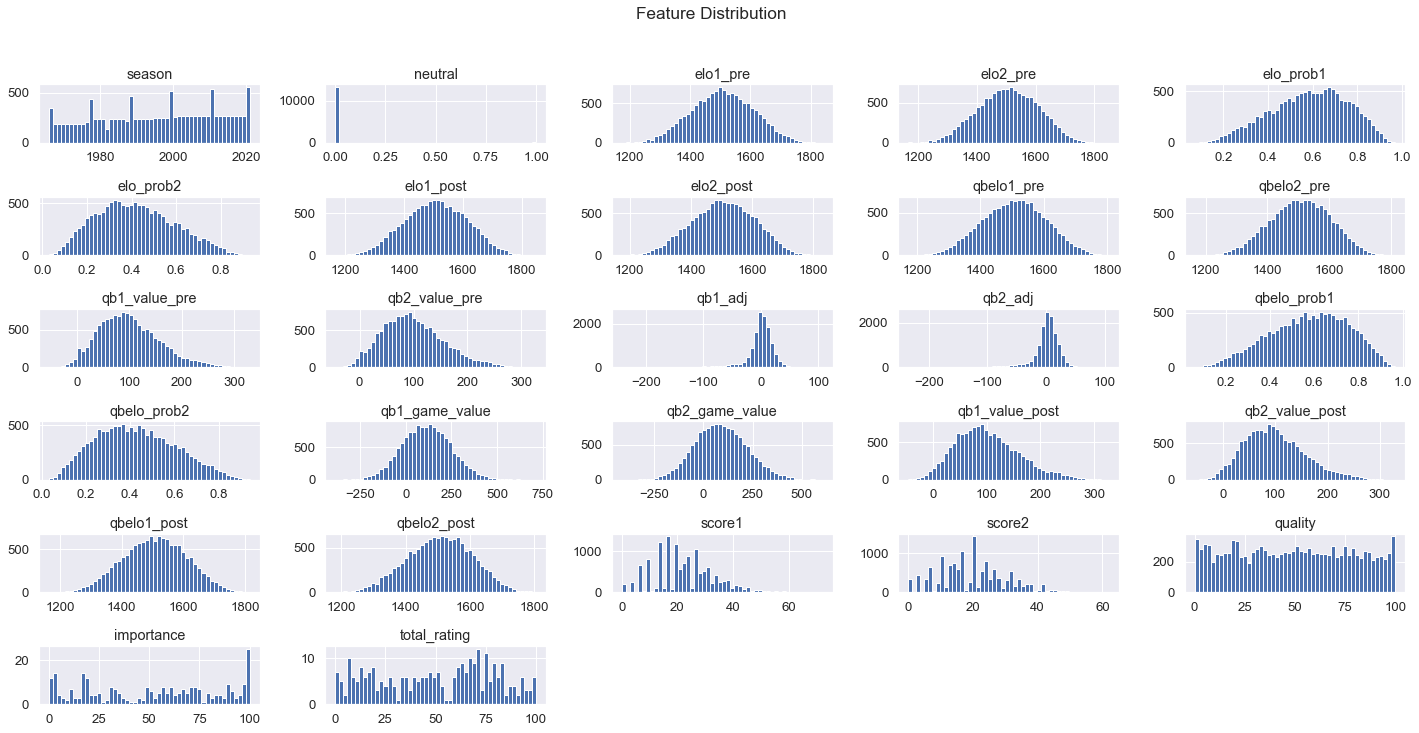

In [23]:
df_SP.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

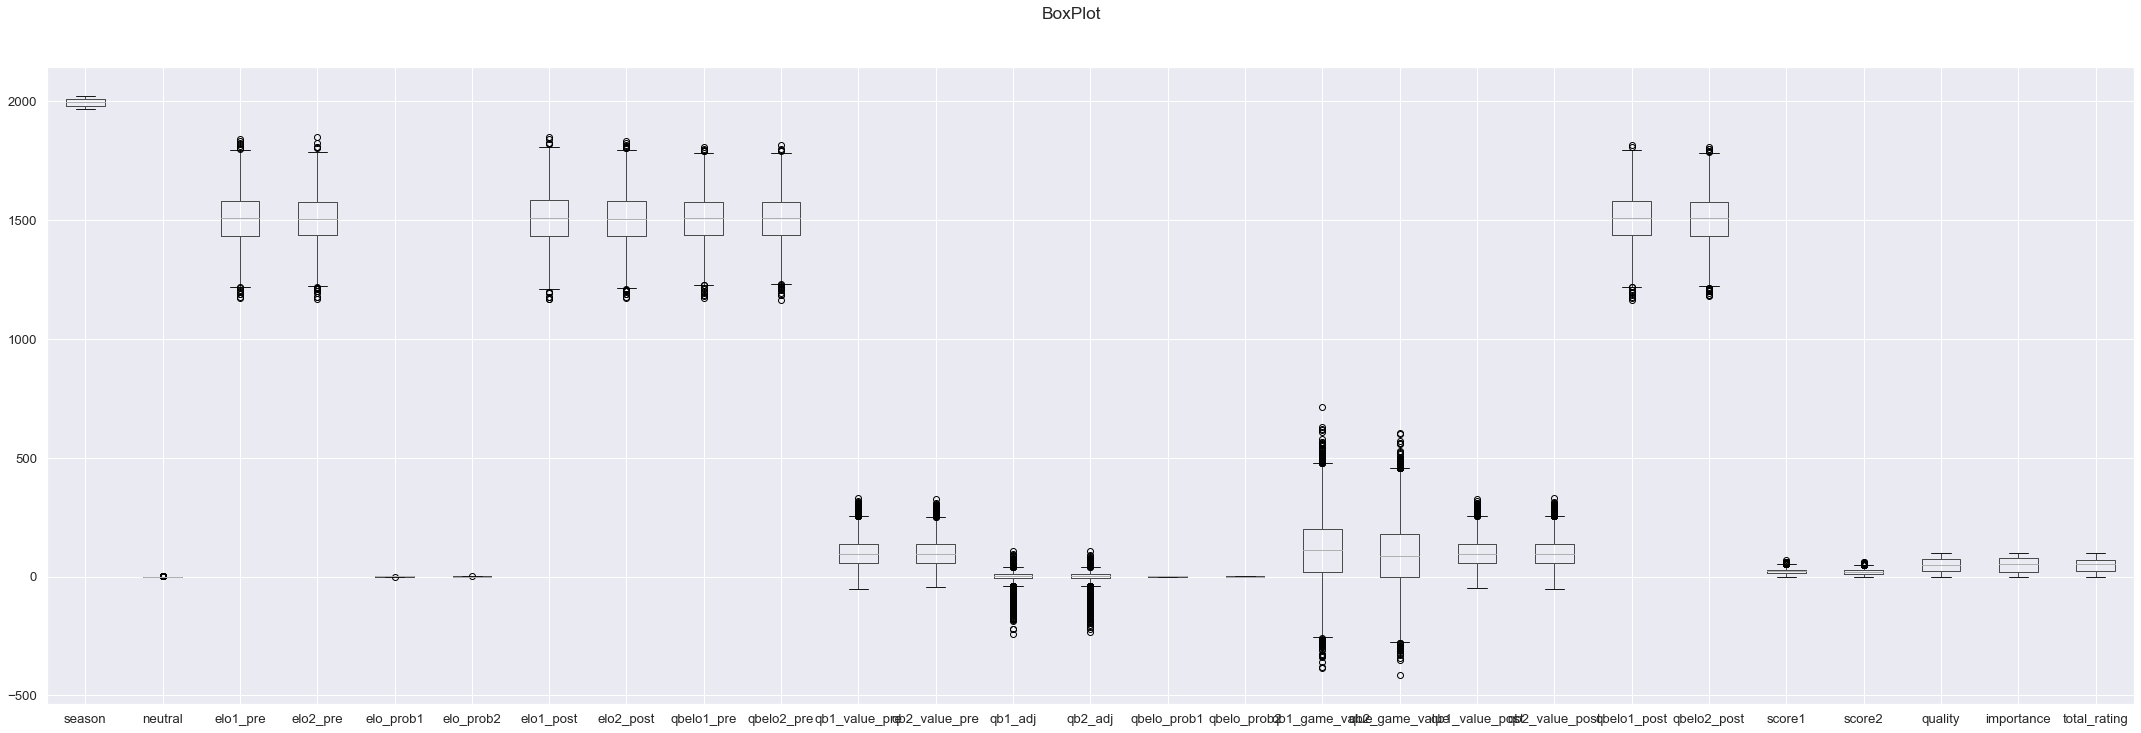

In [26]:
df_SP.boxplot(figsize=(30,10))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

In [28]:
packers_home = df_SP[df_SP['team1'] == 'GB']

In [29]:
packers_away = df_SP[df_SP['team2'] == 'GB']

In [31]:
packers = pd.concat([packers_home, packers_away])

In [34]:
packers.sort_values('date', inplace=True)

In [35]:
packers

season  neutral playoff team1 team2     elo1_pre     elo2_pre  elo_prob1  elo_prob2    elo1_post    elo2_post   qbelo1_pre   qbelo2_pre            qb1              qb2  qb1_value_pre  qb2_value_pre     qb1_adj     qb2_adj  qbelo_prob1  qbelo_prob2  qb1_game_value  qb2_game_value  qb1_value_post  qb2_value_post  qbelo1_post  qbelo2_post  score1  score2  quality  importance  total_rating
date                                                                                                                                                                                                                                                                                                                                                                                                            
1966-09-10    1966        0     NaN    GB   IND  1617.725000  1586.751000   0.634709   0.365291  1639.363000  1565.112000  1606.881656  1608.973916     Bart Starr    Johnny Unitas      92.009419     162.344426   -3.540764    9.874700     0.558534     0.441466      184.927540      -12.850207      101.301231      144.824963  1633.675841  1582.179732      24       3     92.0         NaN           NaN
1966-09-18    1966        0     NaN   CLE    GB  1582.318000  1639.363000   0.511446   0.488554  1575.202000  1646.479000  1582.851078  1633.675841     Frank Ryan       Bart Starr      94.381489     101.301231    3.637616    1.282180     0.511599     0.488401      234.218385      281.641138      108.365178      119.335222  1575.732732  1640.794187      20      21     92.0         NaN           NaN
1966-09-25    1966        0     NaN    GB   LAR  1646.479000  1516.079000   0.754880   0.245120  1657.668000  1504.891000  1640.794187  1498.258347     Bart Starr    Roman Gabriel     119.335222     135.732348   10.235067   16.700544     0.752049     0.247951      254.456288       17.597618      132.847329      123.918875  1652.124194  1486.928340      24      13     84.0         NaN           NaN
1966-10-02    1966        0     NaN    GB   DET  1657.668000  1492.499000   0.790006   0.209994  1666.422000  1483.744000  1652.124194  1502.172537     Bart Starr        Milt Plum     132.847329      50.923903   16.479367   -4.212413     0.786785     0.213215      226.626882       75.220927      142.225284       53.353606  1661.025416  1493.271314      23      14     84.0         NaN           NaN
1966-10-09    1966        0     NaN    SF    GB  1469.961000  1666.422000   0.319352   0.680648  1479.997000  1656.387000  1463.972498  1661.025416    George Mira       Bart Starr      25.383454     142.225284  -98.523058   20.344376     0.188508     0.811492      152.244406      244.499884       38.069549      152.452744  1476.687776  1648.310139      21      20     52.0         NaN           NaN
...            ...      ...     ...   ...   ...          ...          ...        ...        ...          ...          ...          ...          ...            ...              ...            ...            ...         ...         ...          ...          ...             ...             ...             ...             ...          ...          ...     ...     ...      ...         ...           ...
2021-12-19    2021        0     NaN   BAL    GB  1571.269003  1669.434523   0.452415   0.547585  1565.090339  1675.613188  1571.771422  1644.588760  Tyler Huntley    Aaron Rodgers       3.343388     257.968760 -174.193487   18.609774     0.232091     0.767909      447.231253      272.802876       47.732175      259.452172  1568.831705  1647.528477      30      31     58.0        89.0          74.0
2021-12-25    2021        0     NaN    GB   CLE  1675.613188  1508.198319   0.792142   0.207858  1679.743906  1504.067601  1647.528477  1522.642954  Aaron Rodgers   Baker Mayfield     259.452172     114.951431   18.420991  -18.912013     0.778892     0.221108      290.001903      -98.544019      262.507145       93.601886  1651.947347  1518.224084      24      22     84.0        78.0          81.0
20

In [39]:
packers.corr()

season   neutral  elo1_pre  elo2_pre  elo_prob1  elo_prob2  elo1_post  elo2_post  qbelo1_pre  qbelo2_pre  qb1_value_pre  qb2_value_pre   qb1_adj   qb2_adj  qbelo_prob1  qbelo_prob2  qb1_game_value  qb2_game_value  qb1_value_post  qb2_value_post  qbelo1_post  qbelo2_post    score1    score2   quality  importance  total_rating
season          1.000000 -0.008953  0.199598  0.165291   0.035047  -0.035047   0.200138   0.155781    0.198991    0.163789       0.576369       0.577737  0.055190  0.043425     0.037863    -0.037863        0.312054        0.262810        0.578262        0.571699     0.198647     0.154427  0.237268  0.199490  0.265269         NaN           NaN
neutral        -0.008953  1.000000  0.128356  0.158622  -0.058668   0.058668   0.114241   0.166667    0.115885    0.153706       0.045936       0.094000  0.033603  0.029395    -0.061599     0.061599        0.032959        0.036583        0.047779        0.091705     0.102167     0.160931 -0.007138  0.068326  0.116602    0.128218      0.146207
elo1_pre        0.199598  0.128356  1.000000  0.077619   0.680414  -0.680414   0.979204   0.068679    0.985333    0.085405       0.605246       0.130425  0.146736 -0.025160     0.657548    -0.657548        0.282773       -0.029790        0.597835        0.110130     0.965323     0.074563  0.254228 -0.140972  0.697942    0.134825      0.217390
elo2_pre        0.165291  0.158622  0.077619  1.000000  -0.668363   0.668363   0.079329   0.977154    0.076410    0.984891       0.105027       0.572128  0.023800  0.107039    -0.622580     0.622580        0.030461        0.248750        0.099848        0.563705     0.075182     0.961410 -0.072335  0.257109  0.674315    0.541771      0.544271
elo_prob1       0.035047 -0.058668  0.680414 -0.668363   1.000000  -1.000000   0.665635  -0.660240    0.671067   -0.650650       0.371097      -0.314449  0.087694 -0.091409     0.948409    -0.948409        0.196516       -0.206131        0.371394       -0.324565     0.659128    -0.643622  0.247215 -0.294020  0.031559   -0.254646     -0.201889
elo_prob2      -0.035047  0.058668 -0.680414  0.668363  -1.000000   1.000000  -0.665635   0.660240   -0.671067    0.650650      -0.371097       0.314449 -0.087694  0.091409    -0.948409     0.948409       -0.196516        0.206131       -0.371394        0.324565    -0.659128     0.643622 -0.247215  0.294020 -0.031559    0.254646      0.201889
elo1_post       0.200138  0.114241  0.979204  0.079329   0.665635  -0.665635   1.000000   0.027413    0.964441    0.085836       0.609693       0.121179  0.161480 -0.033456     0.650205    -0.650205        0.355780       -0.106477        0.617068        0.085584     0.987085     0.031414  0.366784 -0.252482  0.687863    0.052029      0.145363
elo2_post       0.155781  0.166667  0.068679  0.977154  -0.660240   0.660240   0.027413   1.000000    0.068023    0.963440       0.080689       0.567247  0.003621  0.114451    -0.622434     0.622434       -0.054834        0.325251        0.060341        0.575596     0.022738     0.986351 -0.196276  0.373170  0.651782    0.611575      0.606053
qbelo1_pre      0.198991  0.115885  0.985333  0.076410   0.671067  -0.671067   0.964441   0.068023    1.000000    0.082815       0.593677       0.132642  0.117845 -0.026078     0.665124    -0.665124        0.277630       -0.026904        0.586464        0.112723     0.977560     0.074109  0.249893 -0.136332  0.700337    0.240350      0.337627
qbelo2_pre      0.163789  0.153706  0.085405  0.984891  -0.650650   0.650650   0.085836   0.963440    0.082815    1.000000       0.118891       0.555653  0.033333  0.076063    -0.619176     0.619176        0.031666        0.244427        0.112439        0.548075     0.081701     0.975863 -0.074361  0.253475  0.685447    0.562489      0.578305
qb1_value_pre   0.576369  0.045936  0.605246  0.105027   0.371097  -0.371097   0.609693   0.080689    0.593677    0.118891       1.000000       0.329649  0.485831 -0.056687     0.440012    -0.440012        0.440670        0

##### Heat Map of DATA Correlation

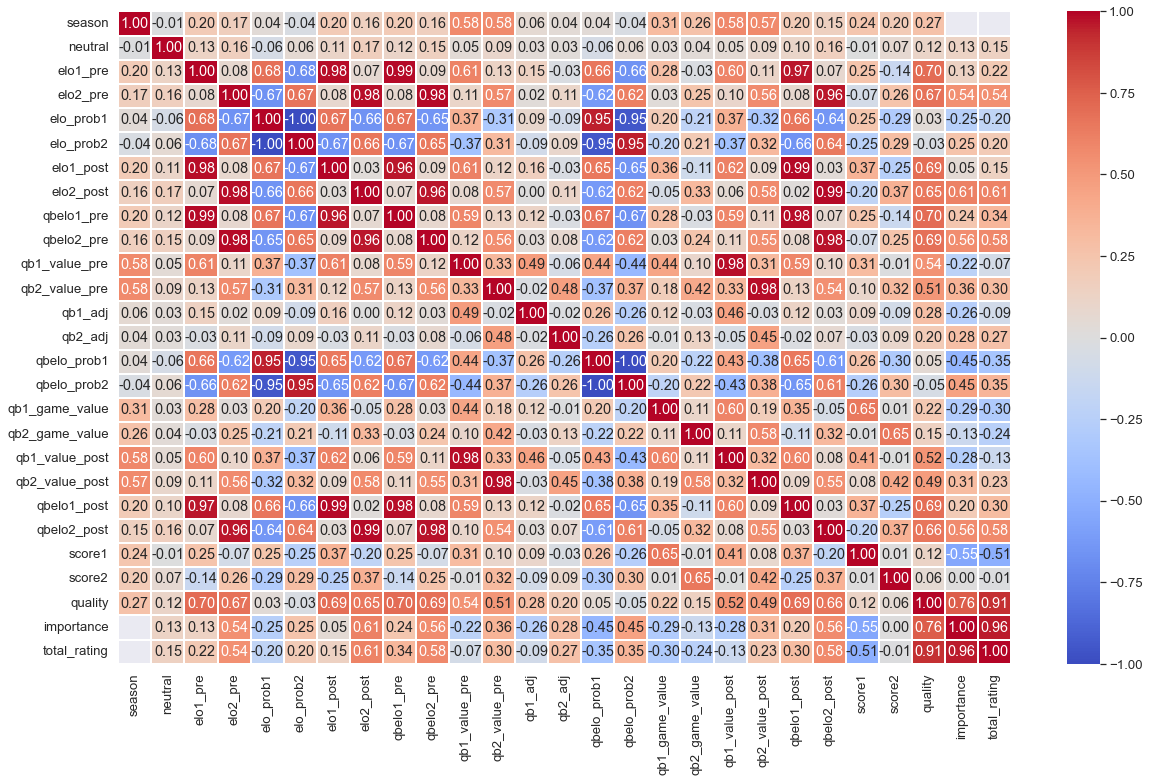

In [37]:
plt.figure(figsize=(20,12))
sns.heatmap(packers.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

In [38]:
packers.to_csv("packersELOdata.csv",index=False)

##### Time-Series

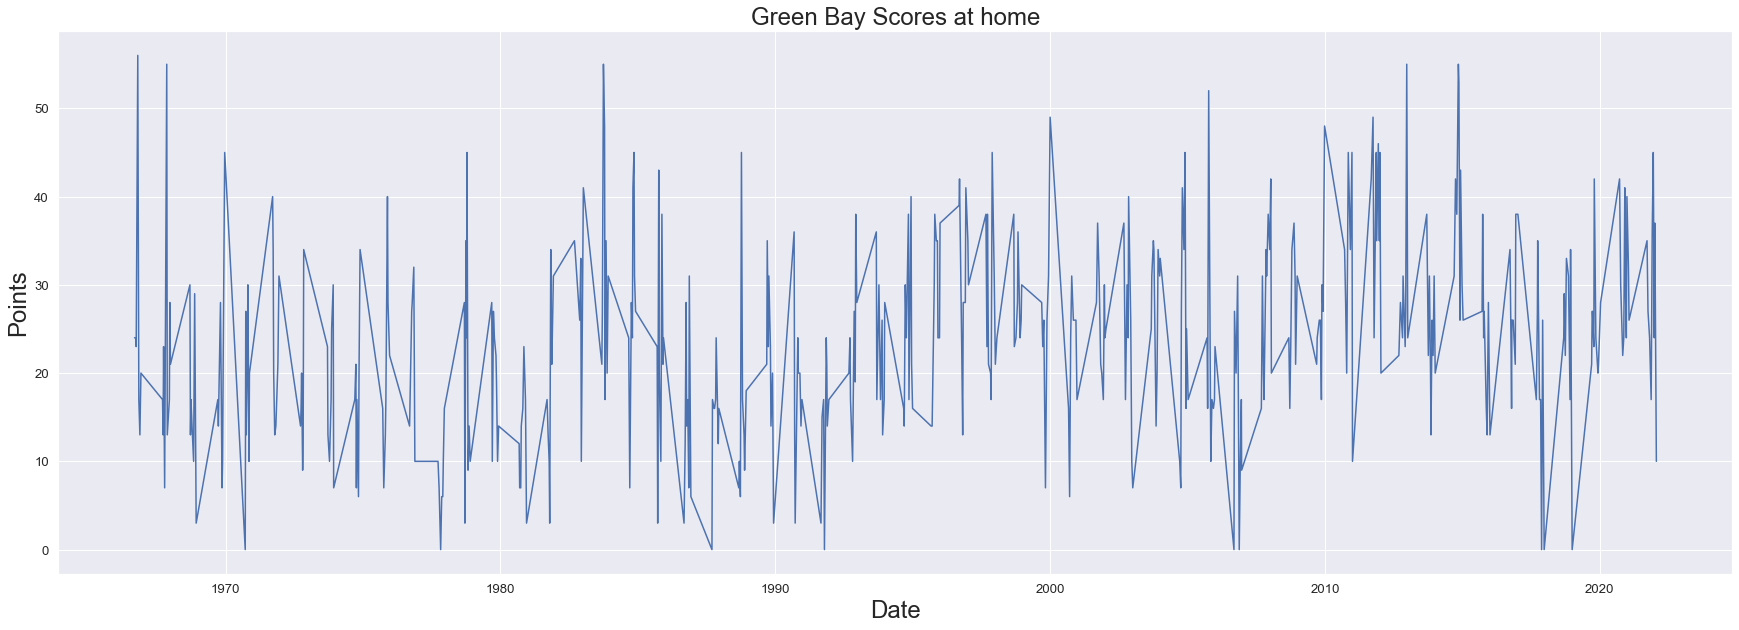

In [42]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=packers_home.index,y=packers_home.score1,data=packers_home, estimator=None)
plt.title("Green Bay Scores at home", fontsize=24)
plt.xlabel("Date",fontsize=24)
plt.ylabel("Points",fontsize=24)
plt.show()

Text(0, 0.5, 'Points')

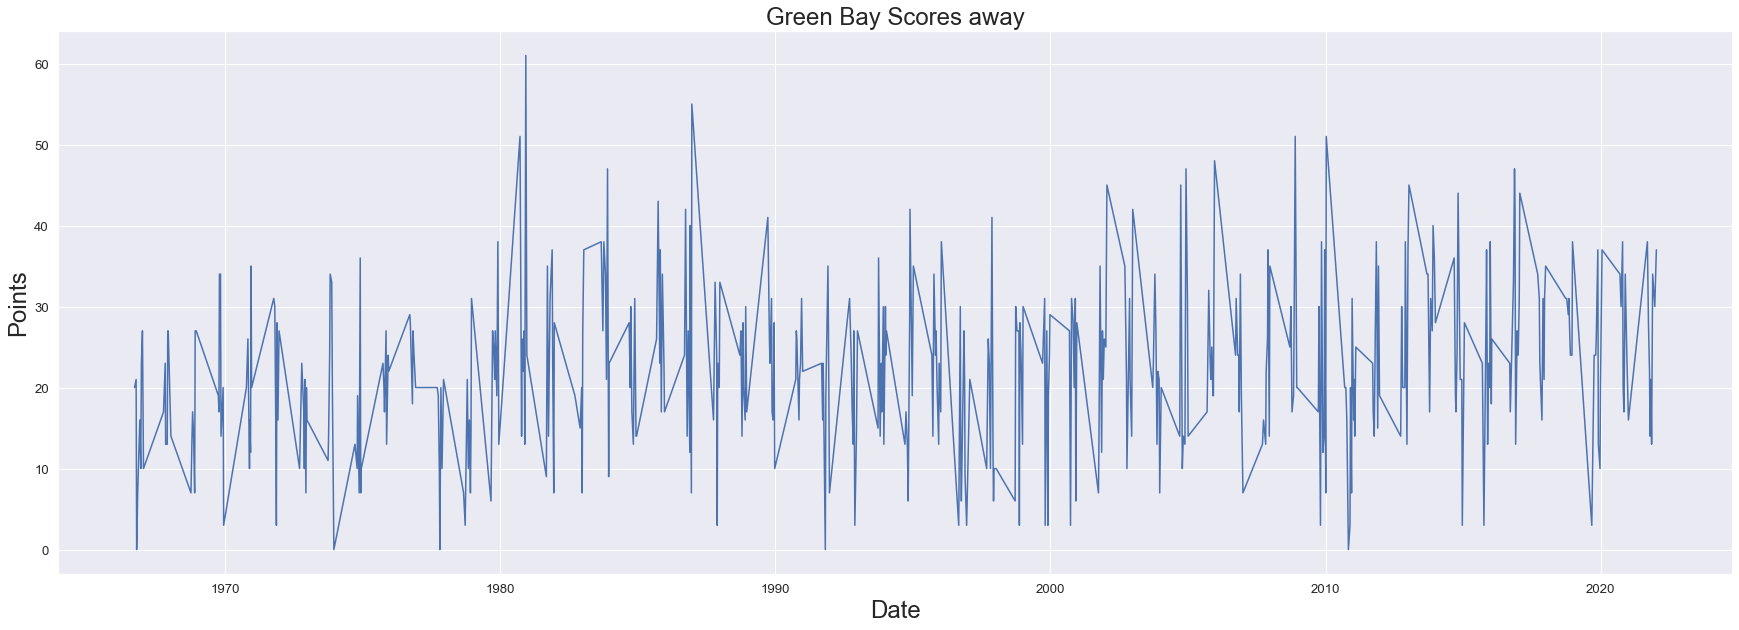

In [44]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=packers_away.index,y=packers_away.score1,data=packers_away, estimator=None)
plt.title("Green Bay Scores away", fontsize=24)
plt.xlabel("Date",fontsize=24)
plt.ylabel("Points",fontsize=24)

##### TREAT MISSING VALUES

In [45]:
packers.isnull().sum()

season              0
neutral             0
playoff           865
team1               0
team2               0
elo1_pre            0
elo2_pre            0
elo_prob1           0
elo_prob2           0
elo1_post           0
elo2_post           0
qbelo1_pre          0
qbelo2_pre          0
qb1                 0
qb2                 0
qb1_value_pre       0
qb2_value_pre       0
qb1_adj             0
qb2_adj             0
qbelo_prob1         0
qbelo_prob2         0
qb1_game_value      0
qb2_game_value      0
qb1_value_post      0
qb2_value_post      0
qbelo1_post         0
qbelo2_post         0
score1              0
score2              0
quality             0
importance        898
total_rating      898
dtype: int64

In [46]:
packers.fillna(0)
packers_home.fillna(0)
packers_away.fillna(0)

season  neutral playoff team1 team2     elo1_pre     elo2_pre  elo_prob1  elo_prob2    elo1_post    elo2_post   qbelo1_pre   qbelo2_pre              qb1            qb2  qb1_value_pre  qb2_value_pre     qb1_adj     qb2_adj  qbelo_prob1  qbelo_prob2  qb1_game_value  qb2_game_value  qb1_value_post  qb2_value_post  qbelo1_post  qbelo2_post  score1  score2  quality  importance  total_rating
date                                                                                                                                                                                                                                                                                                                                                                                                            
1966-09-18    1966        0       0   CLE    GB  1582.318000  1639.363000   0.511446   0.488554  1575.202000  1646.479000  1582.851078  1633.675841       Frank Ryan     Bart Starr      94.381489     101.301231    3.637616    1.282180     0.511599     0.488401      234.218385      281.641138      108.365178      119.335222  1575.732732  1640.794187      20      21     92.0         0.0           0.0
1966-10-09    1966        0       0    SF    GB  1469.961000  1666.422000   0.319352   0.680648  1479.997000  1656.387000  1463.972498  1661.025416      George Mira     Bart Starr      25.383454     142.225284  -98.523058   20.344376     0.188508     0.811492      152.244406      244.499884       38.069549      152.452744  1476.687776  1648.310139      21      20     52.0         0.0           0.0
1966-10-16    1966        0       0   CHI    GB  1574.128000  1656.387000   0.475183   0.524817  1546.873000  1683.642000  1575.290532  1648.310139      Rudy Bukich     Bart Starr      67.055635     152.452744  -17.906836   24.440887     0.415016     0.584984      -99.639963      -27.819342       50.386075      134.425535  1551.932644  1671.668027       0      17     93.0         0.0           0.0
1966-10-30    1966        0       0   DET    GB  1437.062000  1686.689000   0.256775   0.743225  1421.812000  1701.940000  1446.844504  1674.264984     Karl Sweetan     Bart Starr      23.339699     136.554155  -37.584347   14.559286     0.216539     0.783461       -5.955934      199.517729       20.410136      142.850512  1434.189286  1686.920201       7      31     67.0         0.0           0.0
1966-11-27    1966        0       0   MIN    GB  1509.280000  1685.546000   0.345134   0.654866  1492.427000  1702.398000  1509.631275  1670.494128   Fran Tarkenton     Bart Starr     153.059848     129.648969   15.810743    8.862865     0.362744     0.637256      173.257352      197.751124      155.079599      136.459184  1491.815567  1688.309835      16      28     89.0         0.0           0.0
...            ...      ...     ...   ...   ...          ...          ...        ...        ...          ...          ...          ...          ...              ...            ...            ...            ...         ...         ...          ...          ...             ...             ...             ...             ...          ...          ...     ...     ...      ...         ...           ...
2021-10-28    2021        0       0   ARI    GB  1646.520125  1658.992742   0.575022   0.424978  1630.187156  1675.325711  1637.887802  1616.922480     Kyler Murray  Aaron Rodgers     226.838275     235.942955    5.768365    0.059847     0.623547     0.376453       79.357351      158.434616      212.090182      228.192121  1619.881913  1634.928369      21      24     95.0        82.0          89.0
2021-11-07    2021        0       0    KC    GB  1589.142234  1675.325711   0.469552   0.530448  1609.987018  1654.480926  1576.717163  1634.928369  Patrick Mahomes    Jordan Love     223.160358     101.566080   -6.812474 -130.444604     0.669240     0.330760       84.265774       52.605584      209.270900       96.670030  1588.911168  1622.734364      13       7     67.0        72.0          70.0
20

<Figure size 1440x1440 with 0 Axes>

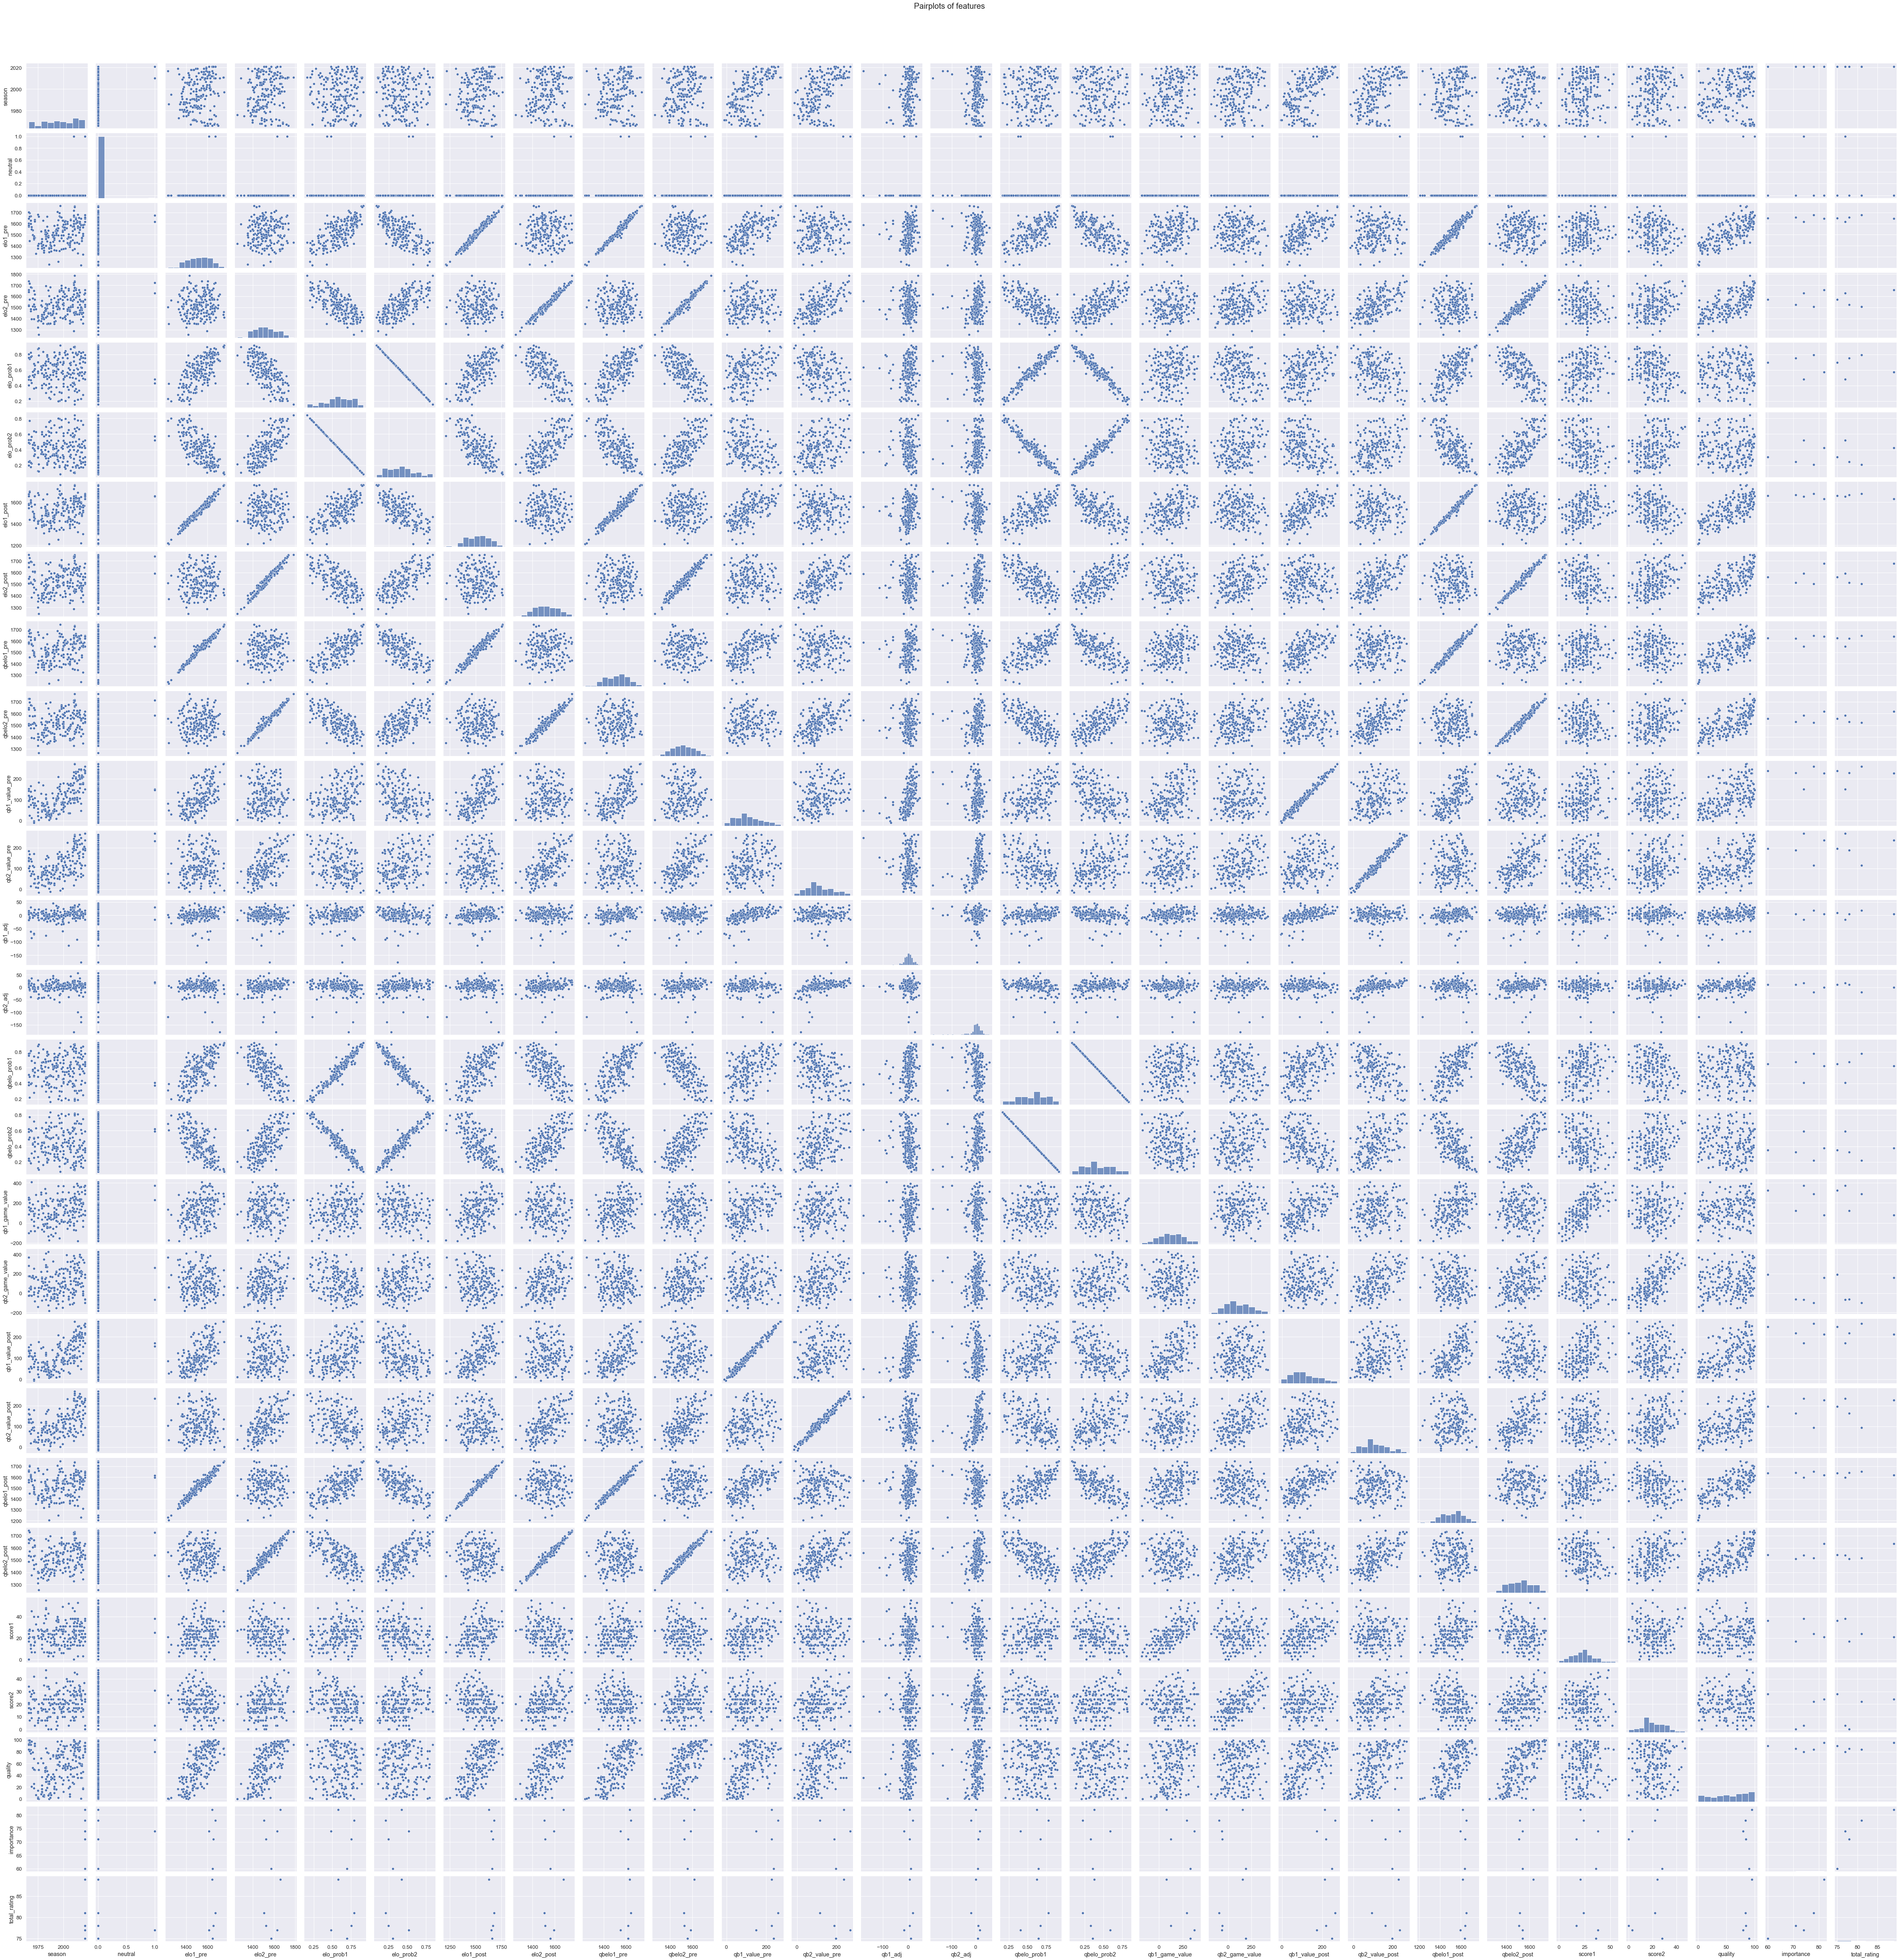

In [47]:
plt.figure(figsize=(20,20))
sns.pairplot(packers.sample(200))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)
plt.show()

In [48]:
packers.to_csv("packersELOdata.csv",index=False)
packers_away.to_csv("packers_AWAY_ELOdata.csv",index=False)

In [49]:
packers_home.to_csv("packers_HOME_ELOdata.csv",index=False)